In [4]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib.dates as mdates
plt.style.use('ggplot')
params = {'legend.fontsize': 'x-large',
        'figure.figsize': (12, 8),
        'axes.labelsize': 'x-large',
        'axes.titlesize':'x-large',
        'xtick.labelsize':'x-large',
        'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

from utils import remove_spikes_mad, compute_vwap

In [3]:
url = "https://raw.githubusercontent.com/yieldcurvemonkey/otr_trace/refs/heads/main/TRACE_10Y/2025-09-17.parquet"
df = pd.read_parquet(url, engine="pyarrow")

clean = remove_spikes_mad(df, price_col="lastSaleYield", bucket="1min", mad_k=7.0, min_trades=10)
vwap_df = compute_vwap(
    df=clean,
    interval="1min",
    group_keys=("cusip",),
    price_col="lastSaleYield",
    volume_col="reportedTradeVolume",
    date_col="tradeDate",
    time_col="tradeTime",
)
vwap_df

c:\Users\chris\clee\otr_trace\utils.py:54: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cleaned = s.groupby(list(group_keys) + ["_bucket"], group_keys=False, sort=False).apply(_trim_bucket).reset_index(drop=True)


volume  trades      open      high  \
cusip     1min_start                                                            
91282CNT4 2025-09-17 08:00:00-04:00  5.347887e+09    2718  4.026905  4.035493   
          2025-09-17 08:01:00-04:00  5.446476e+09    3270  4.023567  4.037458   
          2025-09-17 08:02:00-04:00  5.947199e+09    4612  4.011179  4.035493   
          2025-09-17 08:03:00-04:00  4.512746e+09    2728  4.024044  4.033107   
          2025-09-17 08:04:00-04:00  1.617700e+09     755  4.012608  4.031914   
...                                           ...     ...       ...       ...   
          2025-09-17 16:56:00-04:00  2.503820e+08     145  4.089087  4.090526   
          2025-09-17 16:57:00-04:00  1.023200e+08      56  4.089087  4.090046   
          2025-09-17 16:58:00-04:00  2.142240e+08      88  4.090034  4.091006   
          2025-09-17 16:59:00-04:00  8.902500e+07      56  4.089566  4.090305   
          2025-09-17 17:00:00-04:00  1.000000e+06       1  4.090046  4.090046   

                                          low     close      vwap  
cusip     1min_start                                               
91282CNT4 2025-09-17 08:00:00-04:00  4.003087  4.023091  4.018125  
          2025-09-17 08:01:00-04:00  4.002404  4.015466  4.020270  
          2025-09-17 08:02:00-04:00  4.004515  4.024044  4.020959  
          2025-09-17 08:03:00-04:00  4.003057  4.012608  4.016455  
          2025-09-17 08:04:00-04:00  4.004991  4.020707  4.014447  
...                                       ...       ...       ...  
          2025-09-17 16:56:00-04:00  4.086688  4.089566  4.089431  
          2025-09-17 16:57:00-04:00  4.087168  4.089087  4.089599  
          2025-09-17 16:58:00-04:00  4.088607  4.089806  4.089549  
          2025-09-17 16:59:00-04:00  4.089087  4.089103  4.089872  
          2025-09-17 17:00:00-04:00  4.090046  4.090046  4.090046  

[541 rows x 7 columns]

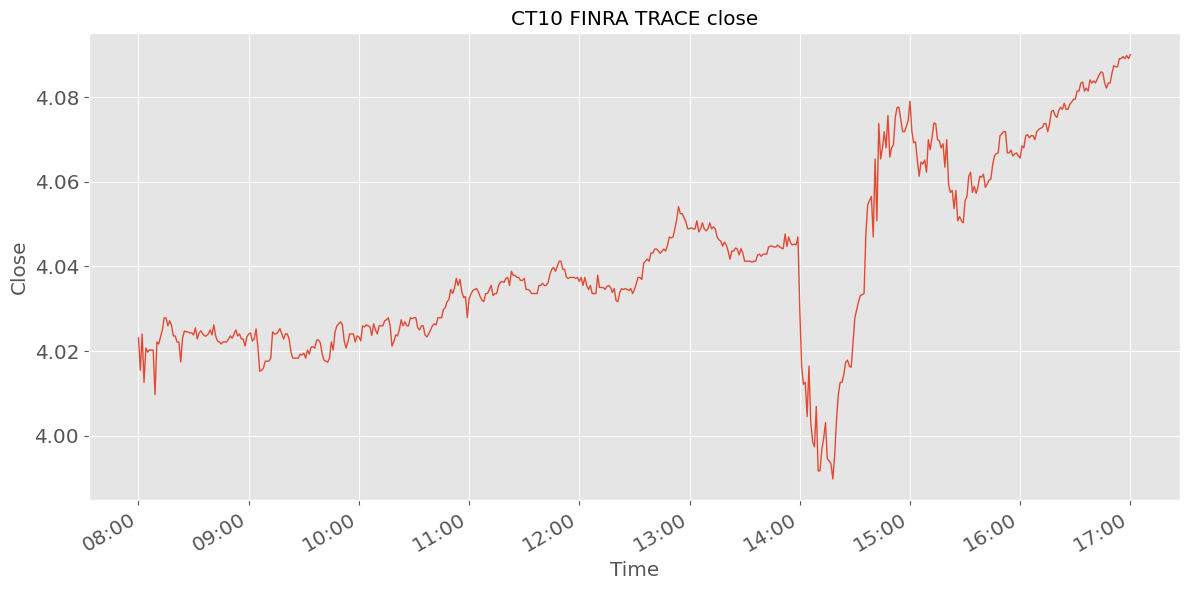

In [28]:
vwap_df_2 = vwap_df.reset_index(level=[0])

col = "close"
s = vwap_df_2[col].copy()

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(s.index, s.values, lw=1)

tz = s.index.tz
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M", tz=tz))
ax.set_title(f"CT10 FINRA TRACE {col}")
ax.set_xlabel("Time")
ax.set_ylabel("Close")
fig.autofmt_xdate()
plt.tight_layout()
plt.show()